# YOLO-tiny

In [1]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


# print results
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Detected remote with confidence 0.994 at location [46.96, 72.61, 181.02, 119.73]
Detected remote with confidence 0.975 at location [340.66, 79.19, 372.59, 192.65]
Detected cat with confidence 0.984 at location [12.27, 54.25, 319.42, 470.99]
Detected remote with confidence 0.922 at location [41.66, 71.96, 178.7, 120.33]
Detected cat with confidence 0.914 at location [342.34, 21.48, 638.64, 372.46]


In [10]:
img_data = requests.get(url).content
with open('sample.jpg', 'wb') as handler:
    handler.write(img_data)

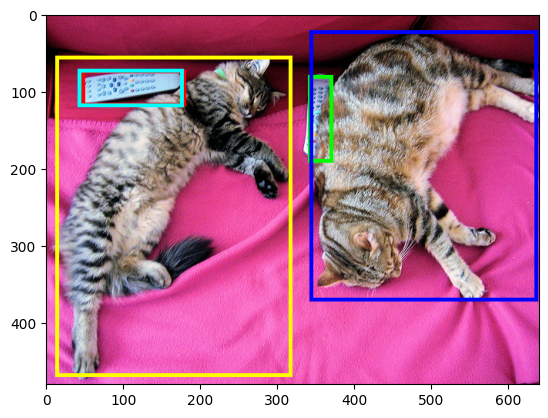

In [14]:
# Import the required libraries
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
from matplotlib import pyplot as plt


# read input image from your computer
img = read_image('sample.jpg')
# create boxes
box = results['boxes']
#box = torch.tensor(box, dtype=torch.int)
box = box.clone().detach()
# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5, colors=[(255,0,0),(0,255,0), (255,255,0), (0,255,255), (0,0,255)])


# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)

# display output
plt.imshow(img)

# DETR-renet-50

In [15]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


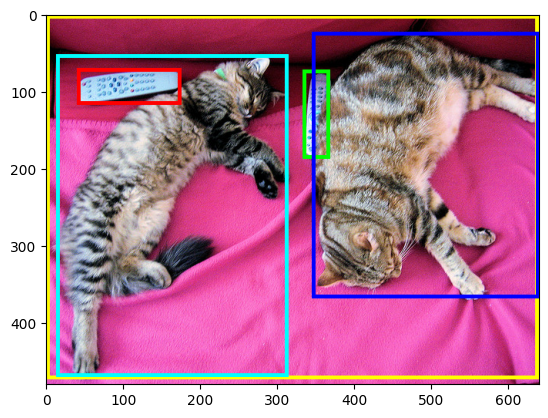

In [16]:
# Import the required libraries
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
from matplotlib import pyplot as plt


# read input image from your computer
img = read_image('sample.jpg')
# create boxes
box = results['boxes']
#box = torch.tensor(box, dtype=torch.int)
box = box.clone().detach()
# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5, colors=[(255,0,0),(0,255,0), (255,255,0), (0,255,255), (0,0,255)])


# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)

# display output
plt.imshow(img)